# Introductory applied machine learning (INFR10069)

# Assignment 2: Linear regression

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

## Mechanics

You should produce a Jupyter notebook in answer to this assignment.
**You need to submit this notebook electronically as described below.**

Place your notebook in a directory called `iamlans` and submit this directory using the submit command on a DICE machine. The format is:

`submit iaml 2 iamlans`

You can check the status of your submissions with the `show_submissions` command.

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).


## Important Instructions

1. In the following questions you are asked to run experiments using Python (version 2.7) and the following packages:
    * Numpy
    * Pandas
    * Scikit-learn
    * Matplotlib
    * Seaborn

2. Before you start make sure you have set up a vitual environment (or conda environment if you are working on your own machine) and the required packages installed. Instructions on how to set-up the working enviornment and install the required packages can be found in `01_Lab_1_Introduction`.

3. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

4. The .csv files that you will be using are located at `./datasets/` (the `datasets` directory is adjacent to this file).

5. **IMPORTANT:** Keep your answers brief and concise. Most questions can be answered with 2-3 lines of explanation (excluding coding questions).

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [2]:
from __future__ import print_function, division
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.cross_validation import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
%matplotlib inline

/afs/inf.ed.ac.uk/user/s16/s1669411/virtualenvs/iaml_env/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Description of the dataset
This assignment is based on the automobile pricing dataset. Our goal will be to predict the price of automobiles based on various attributes. This data set consists of three types of entities: (a) the specification of an automobile in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuaries call this process ”symboling”. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year. To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We removed any instances that had one or more missing values and randomized the data set. The resulting representation is much more compact and can be used directly to perform our experiments.

## 1. Simple Linear Regression [50%]
We will begin by studying a simple Linear Regression model. Such a model will consider the relationship between a dependent (response) variable and only one independent (explanatory) variable. When applying machine learning in practice it can be prudent to start out simple in order to get a feeling for the dataset and for any potential difficulties that might warrant a more sophisticated model. In this Section we will consider one independent variable (i.e. feature) `engine-power` against the dependent variable (i.e. target) `price`.

### ========== Question 1.1 ==========
Load the dataset `train_auto_numeric.csv` into a pandas DataFrame called `auto_numeric`. Display the number of data points and attributes in the dataset.

In [3]:
data_auto= os.path.join(os.getcwd(), 'datasets','train_auto_numeric.csv')
auto_numeric= pd.read_csv(data_auto, delimiter=',')
auto_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 16 columns):
normalized-losses          159 non-null float64
wheel-base                 159 non-null float64
length                     159 non-null float64
width                      159 non-null float64
height                     159 non-null float64
engine-size                159 non-null float64
bore                       159 non-null float64
stroke                     159 non-null float64
compression-ratio          159 non-null float64
engine-power               159 non-null float64
peak-rpm                   159 non-null float64
city-mpg                   159 non-null float64
highway-mpg                159 non-null float64
mean-effective-pressure    159 non-null float64
torque                     159 non-null float64
price                      159 non-null float64
dtypes: float64(16)
memory usage: 19.9 KB


### ========== Question 1.2 ==========
Display the first 8 instances of the dataset.

In [4]:
auto_numeric.head(8)


,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
0,164.0,99.8,176.6,66.2,54.3,8.85,3.19,3.40,10.0,102000.0,5500.0,24.0,30.0,40.52,57.68,13950.0
1,110.0,99.4,162.4,66.4,54.3,15.18,3.19,3.40,8.0,115000.0,5500.0,18.0,22.0,47.39,59.59,17450.0
2,158.0,105.8,192.7,71.4,51.6,15.18,3.94,2.80,8.5,70000.0,4400.0,28.0,30.0,0.85,3344.79,17710.0
3,106.0,86.6,158.7,67.7,55.9,13.74,3.13,3.50,7.8,140000.0,5600.0,32.0,20.0,44.74,68.97,23875.0
4,192.0,101.2,176.8,64.8,54.3,8.67,3.50,2.80,8.8,101000.0,5800.0,23.0,29.0,44.78,53.48,16430.0
5,194.0,110.0,190.9,71.4,58.7,8.67,3.78,3.90,22.5,101000.0,6000.0,47.0,53.0,1.80,1330.28,16925.0
6,188.0,101.2,176.8,64.8,54.3,26.58,3.31,3.19,9.0,121000.0,4250.0,21.0,28.0,7.19,377.06,20970.0
7,150.0,101.2,176.8,64.8,56.1,26.58,3.03,3.19,8.0,134000.0,4400.0,28.0,37.0,57.37,48.20,21105.0


### ========== Question 1.3 ==========
Display the summary statistics for the dataset.

In [5]:
auto_numeric.describe()


,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,121.955975,98.559748,171.698113,65.729560,53.925157,14.056352,3.294528,3.219874,10.446855,98528.301887,5072.012579,27.113208,32.327044,46.180503,200.055031,11684.723270
std,39.434186,5.803361,12.656791,2.292021,2.410446,17.143568,0.296959,0.381833,4.414796,34123.715967,549.988239,7.848229,8.231998,28.780966,513.289289,6744.910579
min,65.000000,86.600000,141.100000,60.300000,49.400000,3.390000,2.540000,2.070000,7.000000,48000.000000,4150.000000,15.000000,18.000000,0.490000,19.400000,5118.000000
25%,93.000000,94.500000,163.400000,64.000000,52.000000,6.960000,3.050000,3.070000,8.600000,69000.000000,4800.000000,22.000000,26.500000,21.775000,34.140000,7372.000000
50%,110.000000,97.000000,171.700000,65.400000,54.100000,9.030000,3.270000,3.270000,9.000000,92000.000000,5100.000000,26.000000,32.000000,49.800000,55.900000,9233.000000
75%,145.000000,101.200000,177.800000,66.500000,55.600000,14.885000,3.580000,3.410000,9.400000,116000.000000,5450.000000,31.000000,37.000000,68.495000,119.990000,14719.500000
max,256.000000,115.600000,202.600000,71.700000,59.800000,174.160000,3.940000,4.170000,23.000000,200000.000000,6600.000000,49.000000,54.000000,99.850000,3912.870000,42056.000000


### ========== Question 1.4  ==========
Produce a scatter plot of `price` against `engine-power`. Label axes appropriately and include a title in your plot.

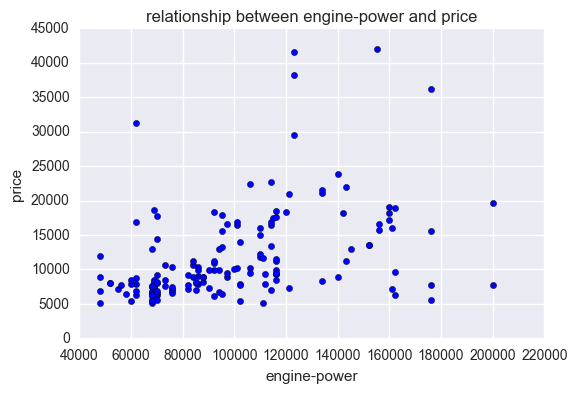

In [6]:
x=auto_numeric["engine-power"]
y=auto_numeric["price"]
plt.scatter(x,y)
plt.xlabel("engine-power")
plt.ylabel("price")
plt.title("relationship between engine-power and price")

### ========== Question 1.5  ==========
Do you think that engine-power alone is sufficient for predicting the price? Can you make any other observations on the data from the above plot? Please explain your answer in 2-3 sentences. 

I don't think the engine-power alone is sufficient for predicting the price, since we can see from the map that they have a negative correlation with each other. Also, we can see the points are spread around but not form a linear form. 

### ========== Question 1.6  ==========
Visualise the distribution of the car prices. Choose a sensible value for the number of bins in the histogram. Again, label axes appropriately and include a title in your plot.

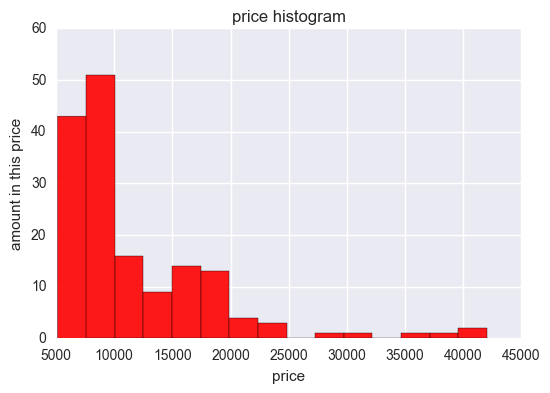

In [7]:
plt.hist(auto_numeric['price'],15, facecolor='r',alpha=.9)
plt.xlabel('price')
plt.ylabel('amount in this price')
plt.title('price histogram')

### ========== Question 1.7  ==========
How would you preprocess it to improve the performance of linear regression? Don’t do it at this stage, but instead in one sentence explain why you would do what you suggested.

I would do the transform for the attribute, ie, log transform, because in this way , we could get a more linearized distribution or function.

### ========== Question 1.8  ==========
Now we want to build a simple linear regression model. First we need to define our input and target variables. Store the values of the attribute `engine-power` in a vector `X` and the values of our target variable `price` in a vector `y`.

In [8]:
X_vector= auto_numeric['engine-power']
Y_vector= auto_numeric['price']


### ========== Question 1.9 ==========
For technical reasons, we need to convert `X` into a 2D array, otherwise we will receive an error when trying to use it for building models. Perform this transformation and confirm that the shape of the resulting array is (`n`,1) where `n` is the number of instances in the dataset. 

In [9]:
n=len(X_vector)
X2darray=np.reshape(X_vector,(n,1))

### ========== Question 1.10  ==========
Now we want to use Hold-out validation to split the dataset into training and testing subsets. Use 80% of the data for training and the remaining 20% for testing. Store your data into matrices `X_train`, `X_test`, `y_train`, `y_test`.

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X2darray,Y_vector, test_size=0.2, random_state=42)


### ========== Question 1.11  ==========
By using Scikit-learn's [`LinearRegression`](http://scikit-learn.org/0.17/modules/generated/sklearn.linear_model.LinearRegression.html) fit a model to the training data. When initialising the model, set the `normalize` parameter to `True` and use default settings for the other parameters.

In [11]:
lr=LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=1)
lr.fit(x_train,y_train)
print (lr.intercept_)
print (lr.coef_)

3157.8767787
[ 0.08854895]


### ========== Question 1.12  ==========
By looking into the attributes of your model, write down an equation for predicting the price of a car given the engine-power.

In [12]:
## the equation of the price will be :
predicted_price=lr.coef_*x_train+lr.intercept_
## or we can directly use:
lr_predict=lr.predict(x_train)
##print(predicted_price)

### ========== Question 1.13  ==========
What happens to the price as one more unit of engine-power is added? By examining the magnitude of the regression coefficient is it possible to tell whether or not engine-power is an important influential variable on price? Explain your answer in 1-2 sentences.

There will be one more price added to the array above since one engine-power realtes to one price. 
Engine-power is not an important infulential variable on price, because the coefficient number we get is pretty small, which means they have a low correlation with each other. 



### ========== Question 1.14  ==========
Produce a scatter plot similar to the one in Question 1.4 but use training data only this time. Add the regression line to the plot and show the predictions on the training set by using a different marker. Label axes appropriately and add a title to the graph. 

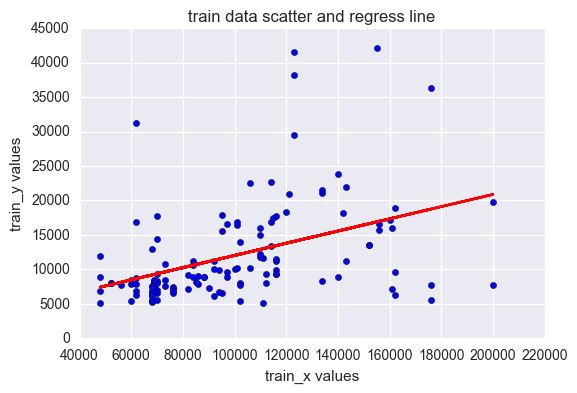

In [13]:
plt.scatter(x_train, y_train)
plt.plot(x_train, lr_predict, color='r')
plt.xlabel('train_x values')
plt.ylabel('train_y values')
plt.title('train data scatter and regress line')

### ========== Question 1.15  ==========
So far we have used Hold-out validation. Can you think of a disadvantage of using this method, especially when dealing with small datasets?

Since we divide the data set into two parts, so the final result(evalution) may depend on the difference how the division was made. Thus, the datasets are small, it may have a high variance of results since there are few datasets, the different division will cause huge differences on results, and it will make the reuslts unreliable. 



### ========== Question 1.16  ==========
Now we want to use [`KFold`](http://scikit-learn.org/0.17/modules/generated/sklearn.cross_validation.KFold.html) cross-validation to evaluate the performance of the regression model. Famliriase yourself with the method and make sure you understand the differences between Hold-out and K-fold cross-validation. By using Scikit-learn's `K-fold` class construct a 5-fold cross-validation iterator for the `auto_numeric` dataset. Set the `shuffle` parameter to `True` and `random_state` to `0`. 

In [14]:
kf=KFold(len(X_vector), n_folds=5, shuffle=True, random_state=0)
print(kf)
for train_index, test_index in kf:
    print("TRAIN:", train_index, "TEST:", test_index)
    kx_train, kx_test = X_vector[train_index], X_vector[test_index]
    ky_train, ky_test = Y_vector[train_index], Y_vector[test_index]


sklearn.cross_validation.KFold(n=159, n_folds=5, shuffle=True, random_state=0)
TRAIN: [  0   1   2   3   4   5   6   9  10  11  12  13  14  15  16  17  18  20
  21  22  23  25  27  28  29  30  31  32  34  35  36  38  39  41  42  43
  46  47  48  49  50  51  52  53  55  57  58  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  84  87  88  89  91  92
  93  94  96  97  98  99 100 101 102 103 104 105 106 107 108 109 111 112
 113 114 115 116 117 118 121 122 123 124 125 127 129 130 132 133 135 136
 137 138 139 140 141 143 145 146 147 149 150 151 152 153 154 155 156 157
 158] TEST: [  7   8  19  24  26  33  37  40  44  45  54  56  59  60  61  62  63  83
  85  86  90  95 110 119 120 126 128 131 134 142 144 148]
TRAIN: [  0   1   3   4   5   6   7   8   9  11  12  13  14  15  17  19  20  21
  23  24  25  26  28  29  31  32  33  34  35  36  37  38  39  40  41  42
  44  45  46  47  48  49  50  52  53  54  55  56  57  58  59  60  61  62
  63  64  65  67  68  69  70  72  

### ========== Question 1.17  ==========
By making use of the iterator you constructed in the previous question, loop through the 5 folds and display the mean value of the `price` variable for the training instances only in each fold.

In [15]:
for train_index, test_index in kf:
    kx_train, kx_test = X_vector[train_index], X_vector[test_index]
    ky_train, ky_test = Y_vector[train_index], Y_vector[test_index]
    print (np.mean(Y_vector[train_index]))

11853.2677165
11635.976378
11689.8740157
11709.8267717
11535.84375


### ========== Question 1.18  ==========
Now initialise a new `LinearRegression` model and fit it by making use of the cross-validation iterator, the `X` and `y` arrays defined above and the [`cross_val_predict`](http://scikit-learn.org/0.17/modules/generated/sklearn.cross_validation.cross_val_predict.html) function. Display the shape of your prediction and confirm it has the same dimensionality as your `y` vector.

In [16]:
lr_new=LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=1)
LR_cross_predict=cross_val_predict(lr_new, X2darray,Y_vector, cv=kf, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')

LR_cross_predict.shape, Y_vector.shape




((159,), (159,))

### ========== Question 1.19  ==========
Report the Coefficient of Determination (R^2), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and Correlation Coefficient (CC) from the simple linear regression model you build in Question 1.18. *Hint: RMSE is the square root of the Mean Squared Error (MSE). For CC you might find numpy's [`corrcoef`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html) function useful.* 

In [17]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print ('the coefficient of determination is:', r2_score(Y_vector,LR_cross_predict))
print ('the Root Squared Error is:', sqrt(mean_squared_error(Y_vector, LR_cross_predict)))
print ('the Mean Absolute Error is :', mean_absolute_error(Y_vector, LR_cross_predict))
print ('the correlation coefficient is:', np.corrcoef(Y_vector, LR_cross_predict))


the coefficient of determination is: 0.173005270976
the Root Squared Error is: 6114.45211862
the Mean Absolute Error is : 3987.95779619
the correlation coefficient is: [[ 1.         0.4171222]
 [ 0.4171222  1.       ]]


### ========== Question 1.20  ==========
What do the above metrics intend to measure? Relate the values of CC, MAE and RMSE to the observations you made in Question 1.5. Explain your answer in 1-2 short paragraphs.

The above metrics intend to meausre how well can engine-power predict the car's price, in other words, to tell us if it is reliable for only using one feature to predict the price. First of all, MAE measured the average magnitude of the errors based on our predicted and true values. RMSE is slightly different than MAE, it applies quadratic socring rule to measure the average magnitude of the errors. Since we know that both MAE and RMSE are negative-orienated, which means the smaller the number is, the better results we could get. However, based on the numbers we got in 1.19, both RMSE and MAE have a large value. Furthemore, we could see that there is a big difference between RMSE and MAE, by the defition of these two methods, we could say that the variance in our sample is large. Thus, we know that the prediction I made in 1.5, which is engine-power is not a sufficient attribute. 
For CC, it measurs the strengh and the direction of the linear relationship between predict values and true values. ##Actually, I am a little confused about this one, why should we measue the correlation or relationship betwwen two Y values? since the ture true Y value always stay the same.##       Anyway, it tells us that the predicted Y value has a postive correlation with True Y value. However, since 0.41 is not very close to 1, the corrleation is not strong, so from this we can also see that engine-power is not a sufficien attribute. 



### ========== Question 1.21 ==========
Show a histogram of the residuals of the linear regression model (i.e. true - predicted values). Label axes appropriately and add a title to your plot. Does the distribution of residuals look like what you expected?

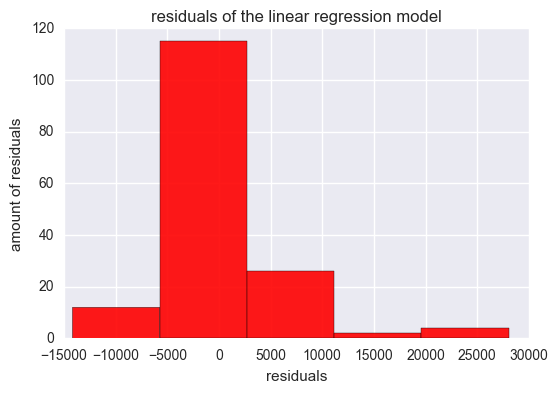

In [18]:
residuals= Y_vector- LR_cross_predict
plt.hist(residuals,5, facecolor='r',alpha=.9)
plt.xlabel('residuals')
plt.ylabel('amount of residuals')
plt.title('residuals of the linear regression model')


yes, it does look like what I expect, because we can see from the plot that the major distribution was ranged from -5000 to 0, which achieved the MAE. 


### ========== Question 1.22 ==========
Load the new dataset `train_auto_base.csv` into a pandas DataFrame `auto_base`. Again by using the `engine-power` attribute as predictor and `price` as target variable build a LinearRegression model on this dataset. Report the R^2, RMSE, MAE and CC metrics for this model by making use of the K-fold CV iterator constructed in Question 1.16.

In [19]:
data1_auto = os.path.join(os.getcwd(), 'datasets','train_auto_base.csv')
auto_base = pd.read_csv(data1_auto, delimiter=',')

base_lr=LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=1)

base_y=auto_base['price']
base_train_2d=np.reshape(auto_base['engine-power'],(len(auto_base['engine-power']),1))
                                                    
base_lr.fit(base_train_2d,base_y)

base_predict_val=cross_val_predict(base_lr, base_train_2d,base_y, cv=kf, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')

print ('the coefficient of determination is:', r2_score(base_y,base_predict_val))
print ('the Root Squared Error is:', sqrt(mean_squared_error(base_y,base_predict_val)))
print ('the Mean Absolute Error is :', mean_absolute_error(base_y,base_predict_val))
print ('the correlation coefficient is:', np.corrcoef(base_y,base_predict_val))

the coefficient of determination is: -0.00213595381121
the Root Squared Error is: 6730.84360395
the Mean Absolute Error is : 4901.86096203
the correlation coefficient is: [[ 1.         -0.06191442]
 [-0.06191442  1.        ]]


### ========== Question 1.23 ==========
Show a scatter plot of true vs. predicted prices and another one of engine-power vs. predicted price. Use a single plot with two subplots. Label axes appropriately.

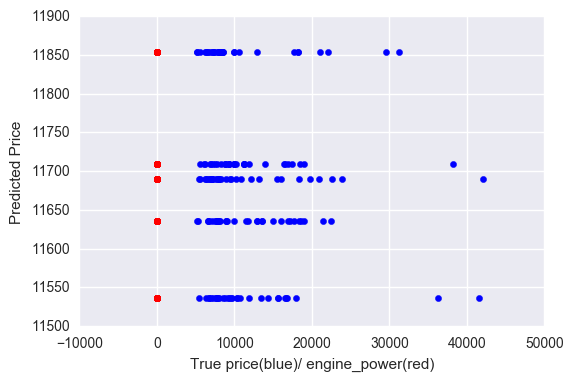

In [20]:
#trye vs predicted price
plt.scatter(base_y,base_predict_val,color='b')
plt.scatter(auto_base['engine-power'],base_predict_val,color='r')
plt.xlabel("True price(blue)/ engine_power(red)")
plt.ylabel("Predicted Price")

### ========== Question 1.24 ==========
What is the simplest baseline model for the purposes of regression? Relate your answer to the regression model you have just built as part of this question. Can the predictions of this model be justified given the procedure you followed to train it?

For the first question, I think the the purposes of regression is to predict a new outcome based on the data we already have, and in my opinion, the baseline for this is the average of the predicted values.  For example, for all the questions we have above, we have used the data we have to build a model, and we used this model to train the new data.  I think the predictions of this model can be justified by the given procedure.

### ========== Question 1.25 ==========
Why do you think this model performs so poorly? (*Hint: Justify your answer by displaying some statistics of the `auto_base` dataset.*)

In [21]:
auto_base.describe() 


,engine-power,price
count,159.0,159.000000
mean,1.0,11684.723270
std,0.0,6744.910579
min,1.0,5118.000000
25%,1.0,7372.000000
50%,1.0,9233.000000
75%,1.0,14719.500000
max,1.0,42056.000000


the reason why this performs so poorly is because everyone engine-power's value is 1, which does not make any sense, and it can not provide any useful information for use to see how does engine-ower correlates to price. 


## 2. Multivariate Linear Regression [50%]
In this Section we will fit a Multivariate Linear Regression model (LinearRegression) to the dataset. In contrast to Part 1, we will now train a model with multiple explanatory variables and ascertain how they affect our ability to predict the retail price of a car. One of our foremost concerns will be to determine exactly which attributes to include in the model and which may be left out.

### ========== Question 2.1 ==========
Use the original dataset (`auto_numeric`) and a visualisation tool of your choice to examine whether or not any of the other attributes are particularly good at predicting the price. Can you find any? Do any attributes appear useless at predicting the price? Do any attributes exhibit significant correlations? As you answer these questions, list two attributes for each question but do not modify the dataset at this stage. Of the attributes you listed, which ones could you safely remove? Explain in 4-5 sentences. *Hint: you might find seaborn's [`pairplot`](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html) function useful for this question.*

In [22]:
#sns.pairplot(data=auto_numeric,x_vars=["normalized-losses"],y_vars=["price"],dropna=True)
#sns.pairplot(data=auto_numeric,x_vars=["wheel-base"],y_vars=["price"],dropna=True)
#sns.pairplot(auto_numeric,x_vars=auto_numeric["length"],y_vars=auto_numeric["price"],dropna=True)
#sns.pairplot(auto_numeric,x_vars=auto_numeric["width"],y_vars=auto_numeric["price"],dropna=True)
#sns.pairplot(auto_numeric,x_vars=auto_numeric["height"],y_vars=auto_numeric["price"],dropna=True)
#sns.pairplot(auto_numeric,x_vars=auto_numeric["engine-size"],y_vars=auto_numeric["price"],dropna=True)
#sns.pairplot(auto_numeric,x_vars=auto_numeric["bore"],y_vars=auto_numeric["price"],dropna=True)

In [23]:
#XV= auto_numeric.drop('price', axis=1)
#YV= auto_numeric['price']
#X_head =XV.columns.values.tolist()
#sns.pairplot(data=auto_numeric,x_vars=X_head,y_vars=YV, kind='reg')

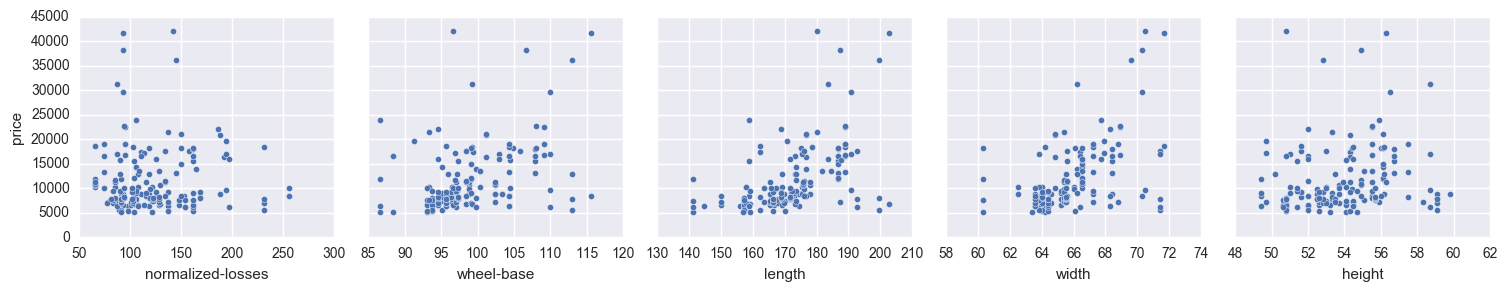

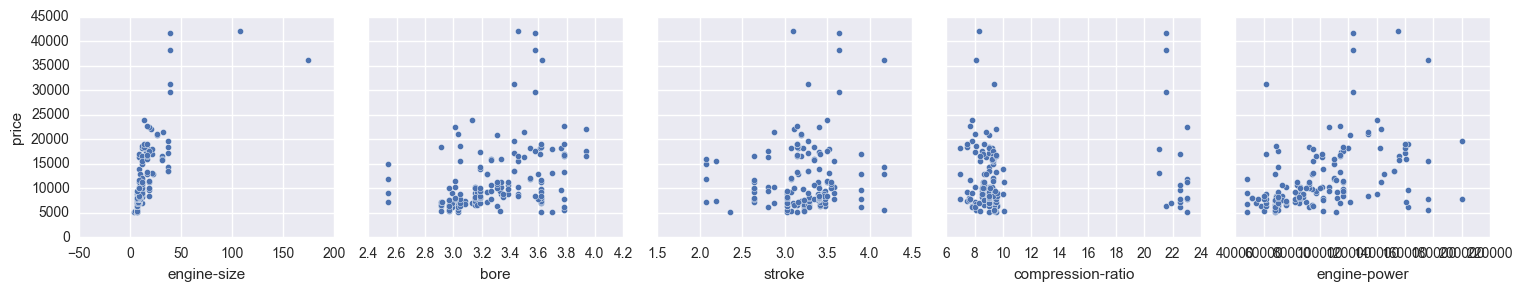

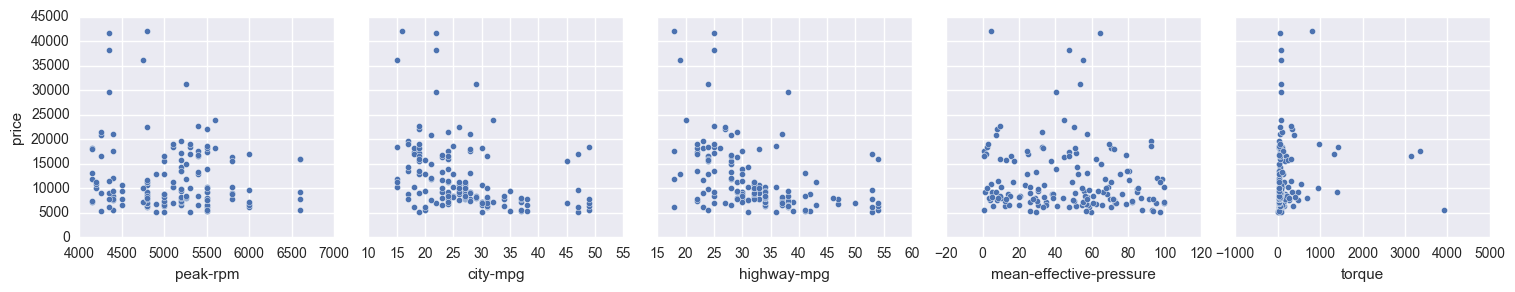

In [24]:

sns.pairplot(data=auto_numeric, x_vars=['normalized-losses','wheel-base', 'length', 'width', 'height'], y_vars =['price'], size=3)
sns.pairplot(data=auto_numeric, x_vars=['engine-size','bore', 'stroke', 'compression-ratio', 'engine-power'], y_vars =['price'], size=3)
sns.pairplot(data=auto_numeric, x_vars=['peak-rpm','city-mpg', 'highway-mpg', 'mean-effective-pressure', 'torque'], y_vars =['price'], size=3)

I can't find any of them are particulary good, but I can say widith and length can be good choices to predict the price. 
I find engine-size and torque are bad attributes to predict the price. 
I guess I could say wheel_base and length have a significant correlation.
Torque and and engine-size could be safely removed. 





### ========== Question 2.2 ==========
We will now make a first attempt at building a Multivariate Linear Regression model using all numeric attributes. Initialise a `LinearRegression` model and predict the output by using 5-fold cross-validation and the `cross_val_predict` function.

In [25]:
target_price=auto_numeric['price']
train_features=auto_numeric.drop('price',axis=1)



lr_multi= LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=1)




kf_new = KFold(len(train_features), n_folds=5, shuffle=True, random_state=0)

##for train_index, test_index in kf_new:
   ## X_train_MLR, X_test_MLR = train_features[train_index], train_features[test_index]
    ##y_train_MLR, y_test_MLR = target_price[train_index], target_price[test_index]

ml_predict=cross_val_predict(lr, train_features, target_price, cv = kf)
ml_predict


array([ 12141.48540133,  14263.92266306,  17844.89192272,  11409.32319581,
        12230.82524348,  15108.87077676,  14115.0873342 ,  10008.94545761,
        -4653.42476459,   9995.98761812,   3539.63972378,  11324.07141398,
        11552.76828848,   7281.0529653 ,  14188.65394208,   6469.67254081,
         6501.79927928,  11676.93598707,  14101.31538702,   -993.47472833,
        10211.29398794,   4771.85883108,   7298.31467306,   6006.35710962,
        12816.08627167,  12021.95486495,   9161.96930748,  11224.5363507 ,
        12017.01784531,   9736.29305115,  10271.16786875,   9125.95319115,
        69351.94405811,   6207.58789646,   9498.01777413,   6709.07931438,
         6970.72958385,   6892.79291967,   8619.5422547 ,  13629.04321591,
        11942.34449933,   9551.08973028,  11726.93230378,  12644.55816577,
        21954.56856122,  19182.67223854,  23819.23877523,  27750.75875793,
        34336.86187875,   5668.51127439,   6040.09249657,   6178.24117082,
         7390.2112536 ,  

### ========== Question 2.3 ==========
Display the Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and Correlation Coefficient (CC).

In [26]:
# Your code goes here
print ('the coefficient of determination is:', r2_score(target_price,ml_predict))
print ('the Root Squared Error is:', sqrt(mean_squared_error(target_price,ml_predict)))
print ('the Mean Absolute Error is :', mean_absolute_error(target_price,ml_predict))
print ('the correlation coefficient is:', np.corrcoef(target_price,ml_predict))


the coefficient of determination is: 0.486137984457
the Root Squared Error is: 4819.80464283
the Mean Absolute Error is : 3050.34459963
the correlation coefficient is: [[ 1.          0.74256027]
 [ 0.74256027  1.        ]]


### ========== Question 2.4 ==========
 Comment on each metric display above in comparison to what you have obtained for the Simple Linear Regression model in Question 1.19.

in question1.19:
the Root Squared Error is: 6114.45211862
the Mean Absolute Error is : 3987.95779619
the correlation coefficient is: [[ 1.         0.4171222]
 [ 0.4171222  1.       ]]
We could see that , for both RMSE and MAE, their have decreased, which is a good sign. It means our prediction becomes more reliable. Moreover, CC also increases, which means their correlation is more close to each other. 

### ========== Question 2.5 ==========
Examine the histogram for the `engine-size` attribute. Choose a sensible value for the number of bins in the histogram. Label axes appropriately and include a title in your plot.

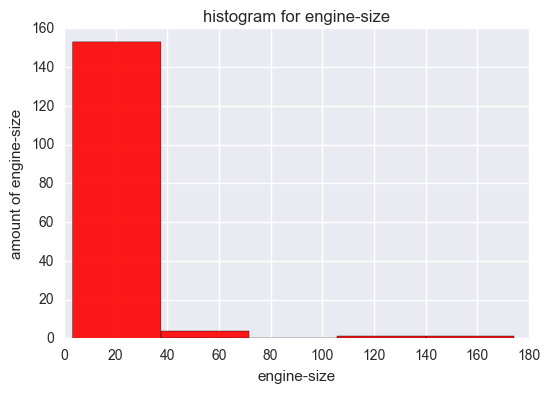

In [27]:
engine_size=auto_numeric['engine-size']
plt.hist(engine_size,5, facecolor='r',alpha=.9)
plt.xlabel('engine-size')
plt.ylabel('amount of engine-size')
plt.title('histogram for engine-size')

### ========== Question 2.6 ==========
Is the distribution expected to cause a problem for regression? Explain your answer in 2-3 sentences.

yes, because they all distributed in one area, which is hard to form a linear regression model. In other words, with this distribution, we could only predict a litmited range of price, which will cause low accuracy. 


### ========== Question 2.7 ==========
Transform this attribute using an appropriate simple technique from the lectures. Plot the histogram of the transformed attribute.

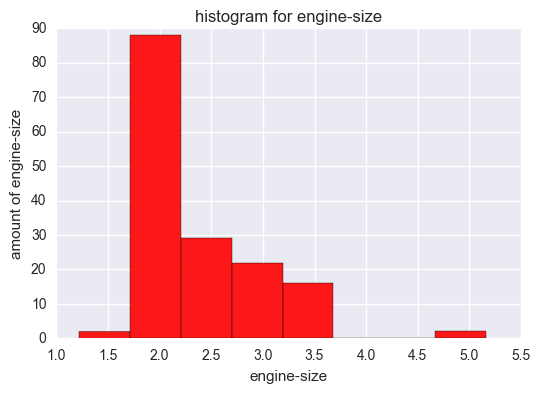

In [28]:

transformed_size=np.log(engine_size)

plt.hist(transformed_size,8, facecolor='r',alpha=.9)
plt.xlabel('engine-size')
plt.ylabel('amount of engine-size')
plt.title('histogram for engine-size')


### ========== Question 2.8 ==========
Now re-build a Linear Regression model on the transformed dataset and report the R^2, RMSE, MAE and CC metrics.

In [29]:
## put the transformed engine-size back to the dataset. 
new_auto_numeric=auto_numeric.copy(deep=True)

new_auto_numeric['engine-size']=transformed_size

train_transformed=new_auto_numeric.drop('price',axis=1)

transf_predict = cross_val_predict(lr, train_transformed, target_price, cv = kf)

print ('the coefficient of determination is:', r2_score(target_price,transf_predict))
print ('the Root Squared Error is:', sqrt(mean_squared_error(target_price,transf_predict)))
print ('the Mean Absolute Error is :', mean_absolute_error(target_price,transf_predict))
print ('the correlation coefficient is:', np.corrcoef(target_price,transf_predict))


the coefficient of determination is: 0.689612268029
the Root Squared Error is: 3745.91959756
the Mean Absolute Error is : 2668.36429567
the correlation coefficient is: [[ 1.          0.83167532]
 [ 0.83167532  1.        ]]


### ========== Question 2.9 ==========
How has the performance of your model changed? Explain your answer in 1-2 sentences.

for 2.3:
the coefficient of determination is: 0.486137984457
the Root Squared Error is: 4819.80464283
the Mean Absolute Error is : 3050.34459963
the correlation coefficient is: [[ 1.          0.74256027]
 [ 0.74256027  1.        ]]
 
It performans better compared to 2.3, since we can see from the R^2, the value of R^2 has increased, the error has decreased, and the correlation is more close.


### ========== Question 2.10 ==========
So far we have performed regression with numeric attributes. We will now attempt to integrate nominal (categorical) attributes into our regression model. 
Load the dataset `train_auto_full.csv` into a pandas DataFrame called `auto_full`. Display the number of samples and attributes in the dataset. Also, display the first 20 instances of the dataset. *Hint: Execute the cell below to change the default for `max_columns` display option in pandas.*

In [30]:
pd.set_option('max_columns', 30)

In [31]:
data_full= os.path.join(os.getcwd(), 'datasets','train_auto_full.csv')
auto_full= pd.read_csv(data_full, delimiter=',')

auto_full.info() ##as shown , 159 and 27.
auto_full.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 27 columns):
normalized-losses          159 non-null float64
make                       159 non-null object
fuel-type                  159 non-null object
aspiration                 159 non-null object
num-of-doors               159 non-null int64
body-style                 159 non-null object
drive-wheels               159 non-null object
engine-location            159 non-null object
wheel-base                 159 non-null float64
length                     159 non-null float64
width                      159 non-null float64
height                     159 non-null float64
engine-type                159 non-null object
num-of-cylinders           159 non-null int64
engine-size                159 non-null float64
fuel-system                159 non-null object
bore                       159 non-null float64
stroke                     159 non-null float64
compression-ratio          159 non-null flo

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,symboling,mean-effective-pressure,torque,price
0,164.0,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,ohc,4,8.85,mpfi,3.19,3.40,10.00,102000.0,5500.0,24.0,30.0,2,40.52,57.68,13950.0
1,110.0,audi,gas,std,4,sedan,4wd,front,99.4,162.4,66.4,54.3,ohc,5,15.18,mpfi,3.19,3.40,8.00,115000.0,5500.0,18.0,22.0,2,47.39,59.59,17450.0
2,158.0,audi,gas,std,4,sedan,fwd,front,105.8,192.7,71.4,51.6,ohc,5,15.18,mpfi,3.94,2.80,8.50,70000.0,4400.0,28.0,30.0,1,0.85,3344.79,17710.0
3,106.0,audi,gas,turbo,4,sedan,fwd,front,86.6,158.7,67.7,55.9,ohc,5,13.74,mpfi,3.13,3.50,7.80,140000.0,5600.0,32.0,20.0,1,44.74,68.97,23875.0
4,192.0,bmw,gas,std,2,sedan,rwd,front,101.2,176.8,64.8,54.3,ohc,4,8.67,mpfi,3.50,2.80,8.80,101000.0,5800.0,23.0,29.0,2,44.78,53.48,16430.0
5,194.0,bmw,gas,std,4,sedan,rwd,front,110.0,190.9,71.4,58.7,ohc,4,8.67,mpfi,3.78,3.90,22.50,101000.0,6000.0,47.0,53.0,0,1.80,1330.28,16925.0
6,188.0,bmw,gas,std,2,sedan,rwd,front,101.2,176.8,64.8,54.3,ohc,6,26.58,mpfi,3.31,3.19,9.00,121000.0,4250.0,21.0,28.0,0,7.19,377.06,20970.0
7,150.0,bmw,gas,std,4,sedan,rwd,front,101.2,176.8,64.8,56.1,ohc,6,26.58,mpfi,3.03,3.19,8.00,134000.0,4400.0,28.0,37.0,0,57.37,48.20,21105.0
8,121.0,chevrolet,gas,std,2,hatchback,fwd,front,88.4,141.1,60.3,53.2,l,3,3.39,2bbl,3.03,3.03,9.50,48000.0,5300.0,47.0,53.0,2,59.33,25.08,5151.0
9,98.0,chevrolet,gas,std,2,hatchback,fwd,front,104.3,155.9,68.3,52.0,ohc,4,6.05,2bbl,3.31,3.47,7.80,70000.0,5000.0,34.0,34.0,1,51.55,36.35,6295.0


### ========== Question 2.11 ==========
This dataset contains a mixture of numeric and nominal attributes. Name the variables that you think are categorical. Why can we not use the nominal attributes in their current form for the purposes of regression? 

nominal:make,fuel-type, aspiration, body-style, drive-wheels, engine-location, engine-type, fuel-system,num-of-doors,num-of-cylinders, symboling.
numeric: the rest of the attributes. 
because the nominal attributes' type is string, we cant fit strings in linear regression.

### ========== Question 2.12 ==========
Now we want to convert the categorical variables by using [One-Hot-Encoding](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder). Familiriase yourself with the class. One limitation with this module is that it can deal only with categorical attributes in integer format (remember that in our example we have attributes in string format). 

Copy the `auto_full` dataframe into a new dataframe `auto_full_edit` and transform the categorical variables by using [Label Encoding](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.LabelEncoder.html). Then transform again the categorical variables by using One-Hot-Encoding. Make sure you don't transform the continuous variables. *Hint: make appropriate use of the `categorical_features` parameter in [`OneHotEncoder`](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder).*

Store the transformed attributes into a numpy array `X_enc` and display its dimensionality.  


In [36]:
auto_full_edit = auto_full.copy(deep=True)

LE = LabelEncoder()
nominal_string = np.array(['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system'])
auto_full_edit.columns
for i in range(len(nominal_string)):
    
    #categorical_values = LE.fit_transform(auto_full_edit[nominal_string[i]])+categorical_values
    ##replace the original nominal attribuites
    auto_full_edit[nominal_string[i]] = LE.fit_transform(auto_full_edit[nominal_string[i]])
    #convert replaced dataframe to array since one-hot encoding only takes array
    #auto_full_edit_array=auto_full_edit.as_matrix()
    ## num-of-doors and cylinders be categorical or numerical?
    ##categorical_values=categorical_values+auto_full_edit['num-of-doors']
    ##categorical_values=categorical_values+auto_full_edit['num-of-cylinders']
        
enc_onehot = OneHotEncoder(categorical_features=[1,2,3,5,6,7,12,15])


    
X_enc = enc_onehot.fit_transform(auto_full_edit)
X_enc.shape



(159, 61)

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,symboling,mean-effective-pressure,torque,price
0,164.0,"(0, 158)\t1.0\n (0, 157)\t1.0\n (0, 156)\t...","(0, 158)\t1.0\n (0, 157)\t1.0\n (0, 156)\t...","(0, 158)\t1.0\n (0, 157)\t1.0\n (0, 156)\t...",4,"(0, 158)\t1.0\n (0, 157)\t1.0\n (0, 156)\t...","(0, 158)\t1.0\n (0, 157)\t1.0\n (0, 156)\t...","(0, 158)\t1.0\n (0, 157)\t1.0\n (0, 156)\t...",99.8,176.6,66.2,54.3,"(0, 158)\t1.0\n (0, 157)\t1.0\n (0, 156)\t...",4,8.85,"(0, 158)\t1.0\n (0, 157)\t1.0\n (0, 156)\t...",3.19,3.4,10.0,102000.0,5500.0,24.0,30.0,2,40.52,57.68,13950.0


### ========== Question 2.13 ==========
By using the transformed data train a multivariate linear regression model and by using 5-fold cross-validation report the R^2, RMSE, MAE and CC metrics.

In [37]:
# Your code goes here

train_edit=auto_full_edit.drop('price',axis=1)
target_edit=auto_full_edit['price']
edit_predict = cross_val_predict(lr, train_edit, target_edit, cv = kf)

print ('the coefficient of determination is:', r2_score(target_price,edit_predict))
print ('the Root Squared Error is:', sqrt(mean_squared_error(target_price,edit_predict)))
print ('the Mean Absolute Error is :', mean_absolute_error(target_price,edit_predict))
print ('the correlation coefficient is:', np.corrcoef(target_price,edit_predict))

the coefficient of determination is: 0.644005502857
the Root Squared Error is: 4011.6941956
the Mean Absolute Error is : 2684.93798568
the correlation coefficient is: [[ 1.          0.83627331]
 [ 0.83627331  1.        ]]


### ========== Question 2.14 ==========
How does this more complex model perform with respect to your best performing model from either question 2.3 or 2.8? List one advantage and one disadvantage of using the more complex model.

Q2.3:
the coefficient of determination is: 0.486137984457
the Root Squared Error is: 4819.80464283
the Mean Absolute Error is : 3050.34459963
the correlation coefficient is: [[ 1.          0.74256027]
 [ 0.74256027  1.        ]]
Q2.8:
the coefficient of determination is: 0.689612268029
the Root Squared Error is: 3745.91959756
the Mean Absolute Error is : 2668.36429567
the correlation coefficient is: [[ 1.          0.83167532]
 [ 0.83167532  1.        ]]
As we can see from above, this method performs better thatn 2.3 but not as good as 2.8.
one advantage of this method is we can deal with string values, and make it contribute to our final prediction, and also the disadvantage can potentially be if there are many attributes, it will take us much time to count which attribute is categorical attributes and which are numerical attributes. In other words, it is not convenient to do so. 

### ========== Question 2.15 ==========
Finally, experiment with tree-based regressors (e.g. [`DecisionTreeRegressor`](http://scikit-learn.org/0.17/modules/generated/sklearn.tree.DecisionTreeRegressor.html), [`RandomForestRegressor`](http://scikit-learn.org/0.17/modules/generated/sklearn.ensemble.RandomForestRegressor.html)) and report 5-fold cross-validation scores for R^2, RMSE, MAE and CC. You should still make use of the transformations applied in 2.8. Has your performance improved? Explain your answer in 1-2 sentences.

In [40]:
from sklearn.cross_validation import cross_val_score
regressor = DecisionTreeRegressor(random_state=0)
#cross_val_score(regressor, train_transformed, target_price, cv=kf)
predict_tree=cross_val_predict(regressor, train_features, target_price, cv = kf)

print ('the coefficient of determination by using desiciontree is:', r2_score(target_price,predict_tree))
print ('the Root Squared Error by using desiciontree is:', sqrt(mean_squared_error(target_price,predict_tree)))
print ('the Mean Absolute Error by using desiciontree is :', mean_absolute_error(target_price,predict_tree))
print ('the correlation coefficient by using desiciontree is:', np.corrcoef(target_price,predict_tree))

forestregressor=RandomForestRegressor(random_state=0)
predict_forest=cross_val_predict(forestregressor, train_features, target_price, cv = kf)
print ('the coefficient of determination by using randomforest is:', r2_score(target_price,predict_forest))
print ('the Root Squared Error by using randomforest is:', sqrt(mean_squared_error(target_price,predict_forest)))
print ('the Mean Absolute Error by using randomforest is :', mean_absolute_error(target_price,predict_forest))
print ('the correlation coefficient by using randomforest is:', np.corrcoef(target_price,predict_forest))

the coefficient of determination by using desiciontree is: 0.685595876154
the Root Squared Error by using desiciontree is: 3770.07764463
the Mean Absolute Error by using desiciontree is : 2594.20125786
the correlation coefficient by using desiciontree is: [[ 1.          0.84477684]
 [ 0.84477684  1.        ]]
the coefficient of determination by using randomforest is: 0.818357477727
the Root Squared Error by using randomforest is: 2865.59585039
the Mean Absolute Error by using randomforest is : 1991.66226415
the correlation coefficient by using randomforest is: [[ 1.          0.90507446]
 [ 0.90507446  1.        ]]


Compared to 2.3, the accuracy has increased by using both DecisionTreeRegressor and RandomForestForest. However, the RandomForest has a better performance. 